In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = '/Users/barganor/Downloads/XY_train (1).csv'

data = pd.read_csv(path)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


In [2]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3639
relevent_experience          0
enrolled_university        311
education_level            370
major_discipline          2237
experience                  48
company_size              4779
company_type              4943
last_new_job               332
training_hours               0
target                       0
dtype: int64

In [3]:
processed_data = data.copy()
# Transform experience to floats and fill nan with the median.
replacement_dct = {'>20':'25','<1':'0'}
processed_data['experience'] = processed_data['experience'].replace(replacement_dct).astype('float64')

# Calculate median
exp_median = np.median(processed_data['experience'].dropna().values)

# Change nan values to calculated median
processed_data['experience'] = processed_data['experience'].fillna(exp_median)

In [4]:
processed_data = processed_data.dropna(thresh=12, axis=0)
processed_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    2278
relevent_experience          0
enrolled_university        106
education_level             56
major_discipline           845
experience                   0
company_size              2629
company_type              2773
last_new_job               117
training_hours               0
target                       0
dtype: int64

In [5]:
print( 'Number Of rows dropped: ' + str(data.shape[0] - processed_data.shape[0]))
print( 'Number Of nan values dropped: ' + str(sum((data.isna().sum() - processed_data.isna().sum()).tolist())))

Number Of rows dropped: 2280
Number Of nan values dropped: 7855


In [6]:
def fill_nan_with_probability(df, col_name):
    filled_df = df.copy()
    no_nan_data = filled_df.dropna(subset=[col_name])
    all_nan_data = filled_df[col_name].isna()
    prob = no_nan_data[col_name].value_counts(normalize=True)
    filled_df.loc[all_nan_data, col_name] = np.random.choice(prob.index, size=len(df[all_nan_data]), p=prob.values)

    f, axes = plt.subplots(1, 2)
    sns.boxplot(x='target', y=col_name, data=no_nan_data, ax=axes[0]).set_title('Before Inserting')
    sns.boxplot(x='target', y=col_name, data=filled_df, ax=axes[1]).set_title('After Inserting')
    plt.show()

    return filled_df

def replace_by_dict(df, col_name):
    if col_name == 'company_size':
        replacement_dict = {
            '50-99': 3,
            '100-500': 4,
            '10000+': 8,
            'Oct-49': 2,
            '1000-4999': 6,
            '<10': 1,
            '500-999': 5,
            '5000-9999': 7
        }
    elif col_name == 'last_new_job':
        replacement_dict = {
            '1': 1,
            '>4': 5,
            '2': 2,
            'never': 0,
            '4': 4,
            '3': 3
        }
    
    elif col_name == 'major_discipline':
        replacement_dict = {
            'STEM':3,
            'Humanities':1,
            'Other':2,
            'Business Degree':6,
            'Arts':4,
            'No Major':5
        }
    else:
        replacement_dict = {}

    df[col_name] = df[col_name].replace(replacement_dict)
    return df

def fill_nan_with_max_appear(df, col_name):
    filled_df = df.copy()
    max_appear = df['education_level'].value_counts().idxmax()

    
    return filled_df[col_name].fillna(max_appear)


In [7]:
processed_data = replace_by_dict(processed_data, 'company_size')
processed_data = replace_by_dict(processed_data, 'last_new_job')
processed_data = replace_by_dict(processed_data, 'major_discipline')

In [8]:
processed_data['company_size'].value_counts()

3.0    2430
4.0    2023
8.0    1605
2.0    1121
6.0    1063
1.0    1027
5.0     694
7.0     454
Name: company_size, dtype: int64

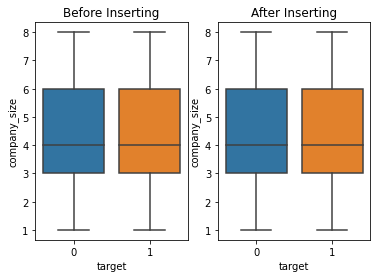

In [9]:
processed_data = fill_nan_with_probability(processed_data, 'company_size')

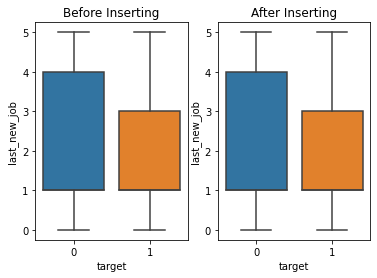

In [10]:
processed_data = fill_nan_with_probability(processed_data, 'last_new_job')

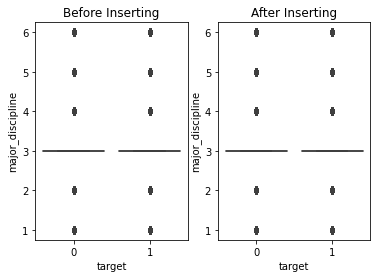

In [11]:
processed_data = fill_nan_with_probability(processed_data, 'major_discipline')

In [12]:
processed_data['education_level'] = fill_nan_with_max_appear(processed_data, 'education_level')

In [13]:
processed_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    2278
relevent_experience          0
enrolled_university        106
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type              2773
last_new_job                 0
training_hours               0
target                       0
dtype: int64